# Task #1


In [ ]:
import pandas as pd



1.   Use Pandas to read the Top_Scorers CSV dataset which contains the following information about top scorers: players names, rank, number of scored goals, and their nationalities



In [ ]:
#using pandas to read csv and json formats of the two datasets
top_scores = pd.read_csv('/content/Top_Scorers_dataset.csv')
top_scores.info()
top_scores


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         20 non-null     int64 
 1   Name         20 non-null     object
 2   Nationality  20 non-null     object
 3   Goals        20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


,Rank,Name,Nationality,Goals
0,1,Alan Shearer,England,260
1,2,Wayne Rooney,England,208
2,3,Andrew Cole,England,187
3,4,Sergio Agüero,Argentina,184
4,5,Frank Lampard,England,177
5,6,Thierry Henry,France,175
6,7,Harry Kane,England,166
7,8,Robbie Fowler,England,163
8,9,Jermain Defoe,England,162
9,10,Michael Owen,England,150



2.   Use Pandas to read the players_stats JSON dataset which contains the following information about top scorers: players names, height, appearances, wins, losses, goals per match ratio, assists, yellow cards, red cards


In [ ]:
players_stats = pd.read_json('/content/players_stats.json')
players_stats.info()
players_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             21 non-null     object 
 1   Height_cm        21 non-null     int64  
 2   Appearances      21 non-null     int64  
 3   Wins             21 non-null     int64  
 4   Losses           21 non-null     int64  
 5   Goals_per_match  21 non-null     float64
 6   Assists          21 non-null     int64  
 7   Yellow_cards     21 non-null     int64  
 8   Red_cards        21 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.6+ KB


,Name,Height_cm,Appearances,Wins,Losses,Goals_per_match,Assists,Yellow_cards,Red_cards
0,Michael Owen,173,326,142,95,0.46,31,10,1
1,Jermain Defoe,171,496,185,188,0.33,33,40,2
2,Harry Kane,188,245,136,57,0.68,34,27,0
3,Mohamed Salah,175,158,107,21,0.61,34,4,0
4,Romelu Lukaku,190,252,112,80,0.45,35,19,0
5,Robbie Keane,176,349,139,122,0.36,37,17,2
6,Jamie Vardy,179,245,103,87,0.48,38,21,3
7,Robbie Fowler,173,379,164,111,0.43,39,27,2
8,Sergio Agüero,173,275,186,45,0.67,47,23,1
9,Nicolas Anelka,185,364,182,95,0.34,48,5,1




3.   Merge the two datasets
    - How I dealt with this point:
      - I used the **'right'** outer join using pandas dataframe function **(merge())** to take all the right table and the common from left table, here the right table is somehow big so filling the null values will be challengeing and affect data if a left outer join is applied or even the full outer join.
      - some columns are returned to their original datatype as 'Rank' column after mergin was tunred into float so it I applied **astype(int)** to return again because the column will be used as index to the new merged table
      - due to the right outer join usage; the uncommon will be NAN, so they were filled with defualt values.
    



In [ ]:
# a right outer join will be applied
merged_table = top_scores.merge(players_stats, on = 'Name', how = 'right')
# reverting 'Rank' and 'Goals' column data type to integer again
merged_table['Rank'] = merged_table['Rank'].fillna(0).astype(int)
merged_table['Goals'] = merged_table['Goals'].fillna(0).astype(int)
# filing the NAN values with default values
merged_table['Nationality'] = merged_table['Nationality'].fillna('Egyptian')
# sorting the merged table by 'Rank' column values
merged_table.sort_values(by = 'Rank',inplace = True)
# setting the merged table index as 'Rank'
merged_table.set_index('Rank', inplace = True)
merged_table

,Name,Nationality,Goals,Height_cm,Appearances,Wins,Losses,Goals_per_match,Assists,Yellow_cards,Red_cards
Rank,,,,,,,,,,,
0,Mohamed Salah,Egyptian,0,175,158,107,21,0.61,34,4,0
1,Alan Shearer,England,260,183,441,203,129,0.59,64,41,2
2,Wayne Rooney,England,208,176,491,284,103,0.42,103,102,3
3,Andrew Cole,England,187,178,414,206,106,0.45,73,40,6
4,Sergio Agüero,Argentina,184,173,275,186,45,0.67,47,23,1
5,Frank Lampard,England,177,184,609,349,127,0.29,102,59,2
6,Thierry Henry,France,175,188,258,157,39,0.68,74,30,0
7,Harry Kane,England,166,188,245,136,57,0.68,34,27,0
8,Robbie Fowler,England,163,173,379,164,111,0.43,39,27,2


<Axes: title={'center': 'Task 1'}, xlabel='Goals', ylabel='Appearances'>

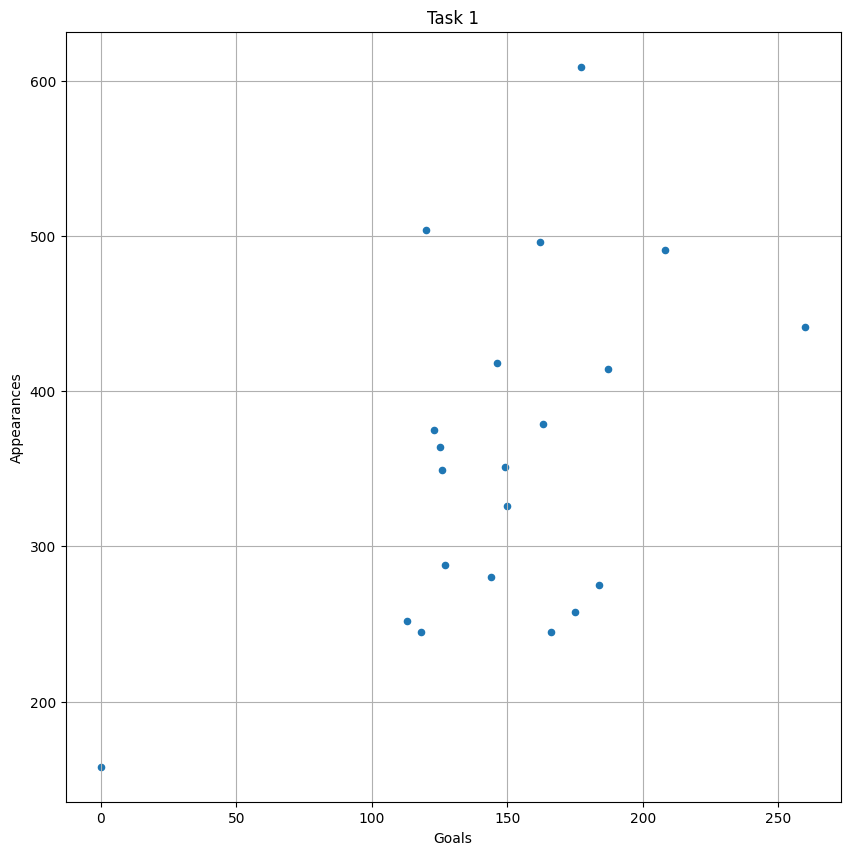

In [ ]:
# let's do some visualizations !!! :)
# scatter plot between the Appearances and Goals
merged_table.plot('Goals','Appearances',kind = 'scatter', figsize= (10,10), title = 'Task 1', grid = True)

# Task #2


*   Use Pandas to read the epldata_final dataset and calculate per club the average age of players in addition to the average of their market value, then write the calculations to a new JSON file.



In [ ]:
# read the dataset

epldata = pd.read_csv('/content/epldata_final.csv')
epldata.info()
epldata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


,Player,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [ ]:
# groupby aggregating function will be used to calculate the average ages ad market value for each club
epldata= epldata.groupby('club')[['age','market_value']].mean()
epldata

,age,market_value
club,,
Arsenal,26.678571,19.642857
Bournemouth,26.875000,4.895833
Brighton+and+Hove,28.318182,2.522727
Burnley,27.944444,3.958333
Chelsea,27.050000,27.677500
Crystal+Palace,28.047619,7.726190
Everton,26.214286,10.098214
Huddersfield,26.000000,1.791071
Leicester+City,27.250000,8.645833


In [ ]:
epldata.to_json('English_clubs.json', orient='columns')

# Task #3
* Use Pandas to read the WA_Fn-UseC_-Telco-Customer-Churn CSV dataset
* Kindly set index of the Pandas dataframe by value of CustomerID
* Kindly remove duplicates from the dataframe
* You may need to convert type of "TotalCharges" column from object to numeric, one of the possible suggestions is to do as the following: df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

  * Take care that the above type conversion will leave some missing values for non-numeric values
  * Why we did this?!, you can try one-hot encoding to know

* Kindly replace the missing values in "TotalCharges" by the average of this column
* Kindly do one-hot encoding for all the categorical columns, except "Contract" and "Churn" columns
* Kindly analyze "Contract" column, and do ordinal encoding for its values as the following:
  * Replace "Month-to-month" by 1
  * Replace "One year" by 2
  * Replace "Two year" by 3
* Kindly convert type of "Contract" column to numeric as we did before, and please don't forget to make sure that there's no missing values left in this column after conversion
* Kindly do label encoding for "Churn" column:
  * Replace "No" by 0
  * Replace "Yes" by 1
* Kindly convert type of "Churn" column to numeric as we did before, and please don't forget to make sure that there's no missing values left in this column after conversion
* Create a separate dataframe contains the “Churn” values, to act as Targets/Labels while training the machine learning model
  * Take care this new dataframe must has "CustomerID" as it's index also
  * kindly remove "Churn" from the original dataframe
* Kindly do normalization for all numerical columns
* Kindly save the two prepared dataframes as CSV files

In [ ]:
# Reading the Telco Customer Churn dataset using pandas
Telco_Customer_Churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
Telco_Customer_Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,NaN,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# displaying some information
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7037 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7040 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset is 7043 entries with 21 columns (features) so, it's kinda big, I cannot deal with it as the pervious datasets, I'm going to apply **EDA** (Exploratory Data Analysis) to fullfil the requirements of this task.

In [ ]:
# calculate the null values for each column
Telco_Customer_Churn.isna().sum()

customerID          0
gender              6
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     3
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       1
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# set index of the datafrom into ('customerID')
Telco_Customer_Churn.set_index('customerID', inplace = True)

In [ ]:
Telco_Customer_Churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,NaN,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
# removing duplicates from dataframe
Telco_Customer_Churn.drop_duplicates(inplace = True)
Telco_Customer_Churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,NaN,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
# checking the data again
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7015 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7018 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7020 non-null 

from using **.info()** it appeared that the dataset contain multiple columns already have missing values, we have 7021 enteries, so:

* gender column has 6 missig values as it's 7015 entery
* InternetService 3 missing
* PaymentMethod 1 missing

In [ ]:
# count unique values in the dataset
Telco_Customer_Churn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
# the column 'TotalCharges' has mixed data types that's why its data type is recognized as object, so I'm going to use the following:
Telco_Customer_Churn['TotalCharges'] = pd.to_numeric(Telco_Customer_Churn['TotalCharges'], errors='coerce')

In [ ]:
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7015 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7018 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7020 non-null 

In [ ]:
# count how many null values after conversion from object to numeric float data type
Telco_Customer_Churn['TotalCharges'].isna().sum()

11

In [ ]:
# filling null values by the mean of the column
Telco_Customer_Churn['TotalCharges'].fillna(Telco_Customer_Churn['TotalCharges'].mean(), inplace = True)

In [ ]:
# Check for null values after filling them
Telco_Customer_Churn['TotalCharges'].isna().sum()

0

In [ ]:
# print columns needed to be one-hot-encoded
Telco_Customer_Churn.select_dtypes(include = 'object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
# save the Telco_Customer_Churn dataframe in another variable to apply one hot encoding using scikit-learn as well as pandas
scikit_data_for_one_hot = Telco_Customer_Churn

In [ ]:
# applying one hot encoding using pandas first
Telco_Customer_Churn = pd.get_dummies(Telco_Customer_Churn, columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod'],dtype=int)

In [ ]:
Telco_Customer_Churn

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,Month-to-month,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,34,One year,56.95,1889.50,No,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3668-QPYBK,0,2,Month-to-month,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,45,One year,42.30,1840.75,No,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,0,2,Month-to-month,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,One year,84.80,1990.50,No,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2234-XADUH,0,72,One year,103.20,7362.90,No,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
4801-JZAZL,0,11,Month-to-month,29.60,346.45,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# checkign again for nulls
Telco_Customer_Churn.isna().sum()


SeniorCitizen                              0
tenure                                     0
Contract                                   0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

#Ordinal Encoding
ordinal data is data inheritly has order like follows:

> small< medium < large

**got it?**

one hot encoding is not useful in this case specialy when the number of categorical data in the dataset is large, so ordinal encoding is applied

In [ ]:
# applying ordinal encoding
# list the unique values of the column
contract_values_list = Telco_Customer_Churn['Contract'].unique()
contract_values_list = contract_values_list.tolist()
contract_values_list

['Month-to-month', 'One year', 'Two year']

In [ ]:
# import the OrdinalEncoder from scikit-learn
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories = [contract_values_list])

Telco_Customer_Churn['Contract'] = encoder.fit_transform(Telco_Customer_Churn[['Contract']])
Telco_Customer_Churn

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0.0,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,34,1.0,56.95,1889.50,No,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3668-QPYBK,0,2,0.0,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,45,1.0,42.30,1840.75,No,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,0,2,0.0,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,1.0,84.80,1990.50,No,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2234-XADUH,0,72,1.0,103.20,7362.90,No,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
4801-JZAZL,0,11,0.0,29.60,346.45,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# convert the Contract column to integer
Telco_Customer_Churn['Contract'] = Telco_Customer_Churn['Contract'].astype(int)
Telco_Customer_Churn

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,34,1,56.95,1889.50,No,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3668-QPYBK,0,2,0,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,45,1,42.30,1840.75,No,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,0,2,0,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,1,84.80,1990.50,No,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2234-XADUH,0,72,1,103.20,7362.90,No,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
4801-JZAZL,0,11,0,29.60,346.45,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# checking null values
Telco_Customer_Churn.isna().sum()

SeniorCitizen                              0
tenure                                     0
Contract                                   0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

everything seems fine, I'm going to move forward to the next step apply a label encoding on churn column


In [ ]:
# import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Telco_Customer_Churn['Churn'] = label_encoder.fit_transform(Telco_Customer_Churn[['Churn']])
Telco_Customer_Churn
# converting the Churn column to integer
Telco_Customer_Churn['Churn'] = Telco_Customer_Churn['Churn'].astype(int)
Telco_Customer_Churn

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,34,1,56.95,1889.50,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3668-QPYBK,0,2,0,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,45,1,42.30,1840.75,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,0,2,0,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,1,84.80,1990.50,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2234-XADUH,0,72,1,103.20,7362.90,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
4801-JZAZL,0,11,0,29.60,346.45,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# creating a separate dataframe contains the 'Churn' values
target = pd.DataFrame(Telco_Customer_Churn['Churn'])
# setting target dataframe index as the original data index
target.set_index(Telco_Customer_Churn.index, inplace = True)
target

,Churn
customerID,
7590-VHVEG,0
5575-GNVDE,0
3668-QPYBK,1
7795-CFOCW,0
9237-HQITU,1
...,...
6840-RESVB,0
2234-XADUH,0
4801-JZAZL,0


In [ ]:
# drop the target column from the original data
Telco_Customer_Churn = Telco_Customer_Churn.drop(columns = 'Churn')
Telco_Customer_Churn

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,29.85,29.85,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,34,1,56.95,1889.50,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
3668-QPYBK,0,2,0,53.85,108.15,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,45,1,42.30,1840.75,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,0,2,0,70.70,151.65,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,1,84.80,1990.50,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2234-XADUH,0,72,1,103.20,7362.90,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
4801-JZAZL,0,11,0,29.60,346.45,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7021 non-null   int64  
 1   tenure                                   7021 non-null   int64  
 2   Contract                                 7021 non-null   int64  
 3   MonthlyCharges                           7021 non-null   float64
 4   TotalCharges                             7021 non-null   float64
 5   gender_Female                            7021 non-null   int64  
 6   gender_Male                              7021 non-null   int64  
 7   Partner_No                               7021 non-null   int64  
 8   Partner_Yes                              7021 non-null   int64  
 9   Dependents_No                            7021 non-null   int64  
 10  Dependents_Yes                        

In [ ]:
Telco_Customer_Churn.columns


Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMet

In [ ]:
#applying normalization for all numerical columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the numerical columns
Telco_Customer_Churn[[ 'tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(Telco_Customer_Churn[[ 'tenure', 'MonthlyCharges', 'TotalCharges']])

Telco_Customer_Churn


,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0.013889,0,0.115423,0.001275,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,0.472222,1,0.385075,0.215867,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
3668-QPYBK,0,0.027778,0,0.354229,0.010310,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,0.625000,1,0.239303,0.210241,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,0,0.027778,0,0.521891,0.015330,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0.333333,1,0.662189,0.227521,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2234-XADUH,0,1.000000,1,0.845274,0.847461,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
4801-JZAZL,0,0.152778,0,0.112935,0.037809,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# save the two prepared dataframes as CSV files
Telco_Customer_Churn.to_csv('Telco_Customer_Churn_prepared.csv')
target.to_csv('Target.csv')

#One Hot Encoding Using Scikit-learn

In [ ]:
# one hot encoding using scikit-learn would require imporing numpy as well as pandas but pandas is already imported
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
# print unique values for each categorical column:
columns = scikit_data_for_one_hot.select_dtypes(include = 'object').columns
columns = columns.to_list()
columns.remove('Contract')
columns.remove('Churn')
for i in columns:
  print(f'{i} : ',scikit_data_for_one_hot[i].unique())

gender :  ['Female' 'Male' nan]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No' nan]
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' nan 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# make onject from OneHotEncoder class
one_hot_obj = OneHotEncoder()

In [ ]:
# use fit_transform() method from the object I've just created
features_array = one_hot_obj.fit_transform(scikit_data_for_one_hot[columns]).toarray()
features_array

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
# save categories in another variable  'labels' for example
labels = one_hot_obj.categories_
labels

[array(['Female', 'Male', nan], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No', nan], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check', nan], dtype=object)]

In [ ]:
# now I'm going to use numpy to organize these categories stored in labels variable
labels = np.concatenate(labels)
labels

array(['Female', 'Male', nan, 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No phone service', 'Yes', 'DSL', 'Fiber optic', 'No', nan, 'No',
       'No internet service', 'Yes', 'No', 'No internet service', 'Yes',
       'No', 'No internet service', 'Yes', 'No', 'No internet service',
       'Yes', 'No', 'No internet service', 'Yes', 'No',
       'No internet service', 'Yes', 'No', 'Yes',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', nan], dtype=object)

In [ ]:
# considering Yes No and NaN categories we have to make some edits manually
labels = labels[ ~pd.isnull(labels) ]
labels

array(['Female', 'Male', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No phone service', 'Yes', 'DSL', 'Fiber optic', 'No', 'No',
       'No internet service', 'Yes', 'No', 'No internet service', 'Yes',
       'No', 'No internet service', 'Yes', 'No', 'No internet service',
       'Yes', 'No', 'No internet service', 'Yes', 'No',
       'No internet service', 'Yes', 'No', 'Yes',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [ ]:
# mapping
mapping = {
    'Yes': ['partner_yes', 'Dependents_yes', 'PhoneService_yes','MultipleLines_yes','OnlineSecurity_yes',
            'DeviceProtection_yes', 'TechSupport_no', 'StreamingTV_no', 'StreamingMovies_no', 'PaperlessBilling_no'],
    'No': ['partner_no', 'Dependents_no', 'PhoneService_no','MultipleLines_no', 'InternetService_no', 'OnlineSecurity_no',
           'DeviceProtection_no', 'TechSupport_no', 'StreamingTV_no', 'StreamingMovies_no', 'PaperlessBilling_no'],
}

In [ ]:
# create dataframe contains the encoded data then concatenate it with the original data taking in consideration that we have to drop the old categorical columns
# new_encoded_data = pd.DataFrame(features_array, columns = labels)
# new_encoded_data


In [ ]:
#Create a dictionary to map old column names to new ones
'''new_column_names = {}
for old_col, new_cols in mapping.items():
    for new_col in new_cols:
        # Map each new column to its corresponding part of the old column name
        new_column_names[new_col] = new_col.split('_')[0]

# Rename the columns
new_encoded_data = new_encoded_data.rename(columns=new_column_names)
new_encoded_data'''

"new_column_names = {}\nfor old_col, new_cols in mapping.items():\n    for new_col in new_cols:\n        # Map each new column to its corresponding part of the old column name\n        new_column_names[new_col] = new_col.split('_')[0]  \n\n# Rename the columns \nnew_encoded_data = new_encoded_data.rename(columns=new_column_names)\nnew_encoded_data"

I tried using scikit-learn for this mission but it gets complicated as a lot of categories are(yes, no) maybe I've should alter the columns names earlier :), for now only pandas were used for one hot encoding